## import necessary librabries

In [88]:
pip install xgboost 

Note: you may need to restart the kernel to use updated packages.


## Import the important libraries

In [163]:
import pandas as pd# Import pandas for data manipulation
import matplotlib.pyplot as plt# Import matplotlib for plotting
import seaborn as sns # Import seaborn for enhanced visualization
from sklearn.model_selection import train_test_split # Import train_test_split for splitting the dataset
from sklearn.preprocessing import LabelEncoder# Import LabelEncoder for encoding categorical variables
from sklearn.ensemble import RandomForestClassifier# Import RandomForestClassifier for classification
from sklearn.metrics import classification_report#

import numpy as np # Import numpy for numerical operations
from sklearn.metrics import confusion_matrix # Import confusion_matrix for evaluating the model
from scipy.stats import chi2_contingency# # Import chi2_contingency for statistical tests
from sklearn.svm import SVC # Import SVC for Support Vector Classification
import xgboost as xgb # Import XGBoost for gradient boosting
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb


# Load data  Car evaluation dataset

In [244]:
# Load data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df = pd.read_csv(url, names=columns)
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


### EXPLORATORY DATA ANALYSIS

## understand the data and looking  features

In [245]:

df.info()# Display information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


## Checking the rows and features

In [95]:
df.shape

(1728, 7)

## Displaying the columns names

In [90]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [98]:
for c in df.columns:
    print(f"\nValue counts for {c}:")
    print(df[c].value_counts())


Value counts for buying:
buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

Value counts for maint:
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

Value counts for doors:
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64

Value counts for persons:
persons
2       576
4       576
more    576
Name: count, dtype: int64

Value counts for lug_boot:
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64

Value counts for safety:
safety
low     576
med     576
high    576
Name: count, dtype: int64

Value counts for class:
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


## checking missing values

In [91]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

# Convert Categorical Data to Numbers

In [132]:


df_encoded = df.apply(LabelEncoder().fit_transform)#  Encode categorical variables using LabelEncoder

df_encoded = df.copy()# Create a copy of the DataFrame to hold encoded values
encoder = LabelEncoder()# Initialize the LabelEncoder

for col in df.columns:# Iterate through each column in the DataFrame
    df_encoded[col] = encoder.fit_transform(df[col])# Encode the column using LabelEncoder

print(df_encoded.head())


   buying  maint  doors  persons  lug_boot  safety  class
0       3      3      0        0         2       1      2
1       3      3      0        0         2       2      2
2       3      3      0        0         2       0      2
3       3      3      0        0         1       1      2
4       3      3      0        0         1       2      2


# Find the summary statistics

In [156]:
df_encoded.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,1.553241
std,1.118358,1.118358,1.118358,0.816733,0.816733,0.816733,0.875948
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,0.750000,0.750000,0.000000,0.000000,0.000000,1.000000
50%,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,2.000000
75%,2.250000,2.250000,2.250000,2.000000,2.000000,2.000000,2.000000
max,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000


# Plotting how data are distributed using boxplot before normalization

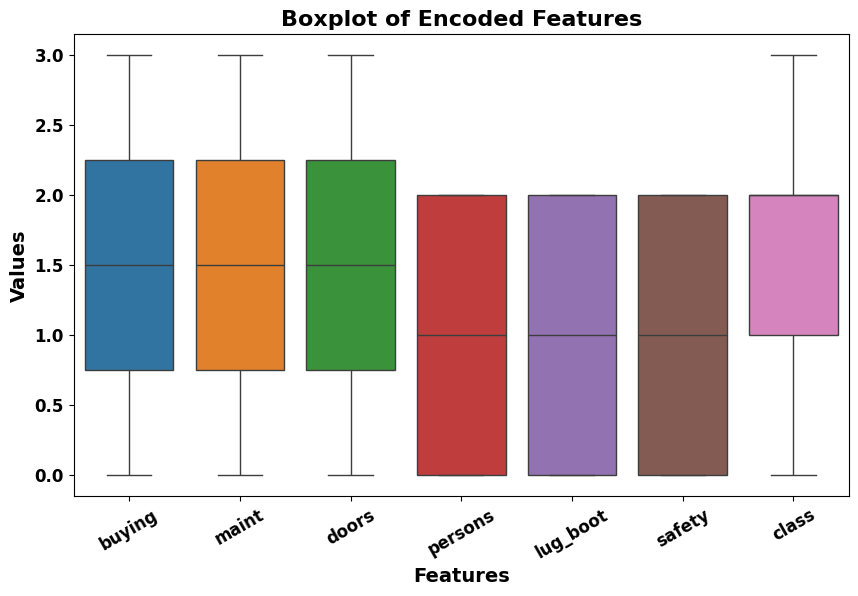

In [242]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_encoded)
plt.title("Boxplot of Encoded Features", fontsize=16, fontweight='bold')
plt.xticks(rotation=30, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.xlabel('Features', fontsize=14, fontweight='bold')
plt.ylabel('Values', fontsize=14, fontweight='bold')
plt.savefig('normalize data-image',dpi=300) ## dpi is the resolution of 300
plt.show()


## Normalize the data  By MinMaxScaler

In [230]:



# Assuming df_encoded is your label-encoded DataFrame
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns)

# View summary
print(df_normalized.describe())


            buying        maint        doors      persons     lug_boot  \
count  1728.000000  1728.000000  1728.000000  1728.000000  1728.000000   
mean      0.500000     0.500000     0.500000     0.500000     0.500000   
std       0.372786     0.372786     0.372786     0.408366     0.408366   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.250000     0.250000     0.250000     0.000000     0.000000   
50%       0.500000     0.500000     0.500000     0.500000     0.500000   
75%       0.750000     0.750000     0.750000     1.000000     1.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

            safety        class  
count  1728.000000  1728.000000  
mean      0.500000     0.517747  
std       0.408366     0.291983  
min       0.000000     0.000000  
25%       0.000000     0.333333  
50%       0.500000     0.666667  
75%       1.000000     0.666667  
max       1.000000     1.000000  


### plotting  how data distributed after normalization 

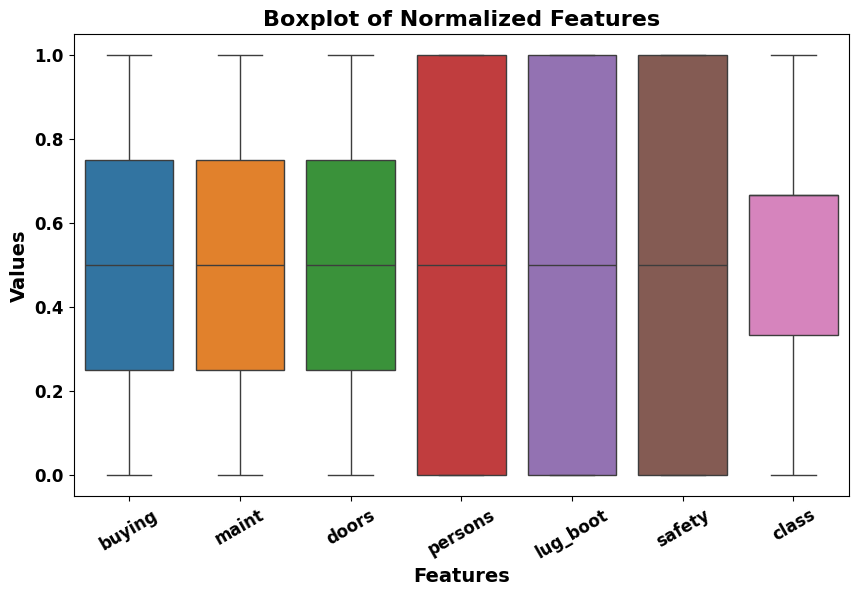

In [243]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_normalized)

plt.title("Boxplot of Normalized Features", fontsize=16 ,fontweight='bold')
plt.xlabel("Features", fontsize=14,fontweight='bold')
plt.ylabel("Values", fontsize=14,fontweight='bold')
plt.xticks(rotation=30, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.savefig('Normalize-image',dpi=300)

plt.show()


## Correlation matrix between features

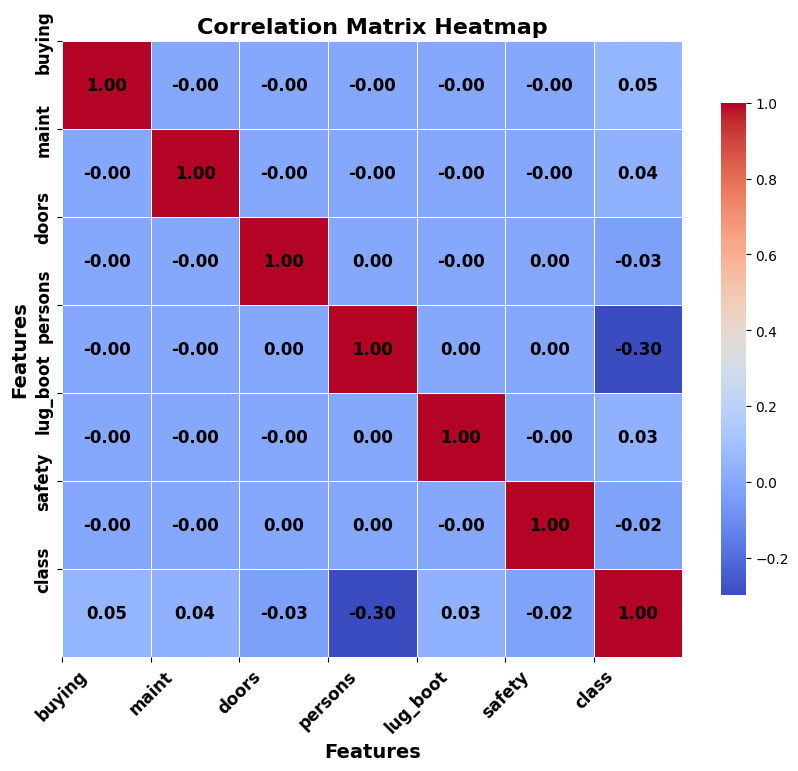

In [232]:


corr_matrix = df_encoded.corr()
columname= corr_matrix.columns
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',annot_kws={"size": 12, "weight": "bold",'color':'k'}, fmt=".2f", linewidths=.5, cbar_kws={"shrink": .8,})
plt.title('Correlation Matrix Heatmap',fontsize=16, fontweight='bold'),
plt.xlabel('Features', fontsize=14, fontweight='bold')
plt.ylabel('Features', fontsize=14, fontweight='bold')
plt.xticks( range(7),rotation=45,labels=columname, fontsize=12, fontweight='bold')
plt.yticks(range(7), labels=columname, fontsize=12, fontweight='bold')
plt.savefig('Correlation matrix -image',dpi=300)
plt.show()


#  Splitting data to train and test

C:\Users\HP\AppData\Local\Temp\ipykernel_3684\1045274690.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=train_df, ax=axes[0], palette='viridis')
C:\Users\HP\AppData\Local\Temp\ipykernel_3684\1045274690.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, fontsize=12, fontweight='bold')
C:\Users\HP\AppData\Local\Temp\ipykernel_3684\1045274690.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_yticklabels(axes[0].get_yticklabels(), fontsize=12, fontweight='bold')
C:\Users\HP\AppData\Local\Temp\ipykernel_3684\1045274690.py:13: FutureWarning: 

Passing `palette` without assignin

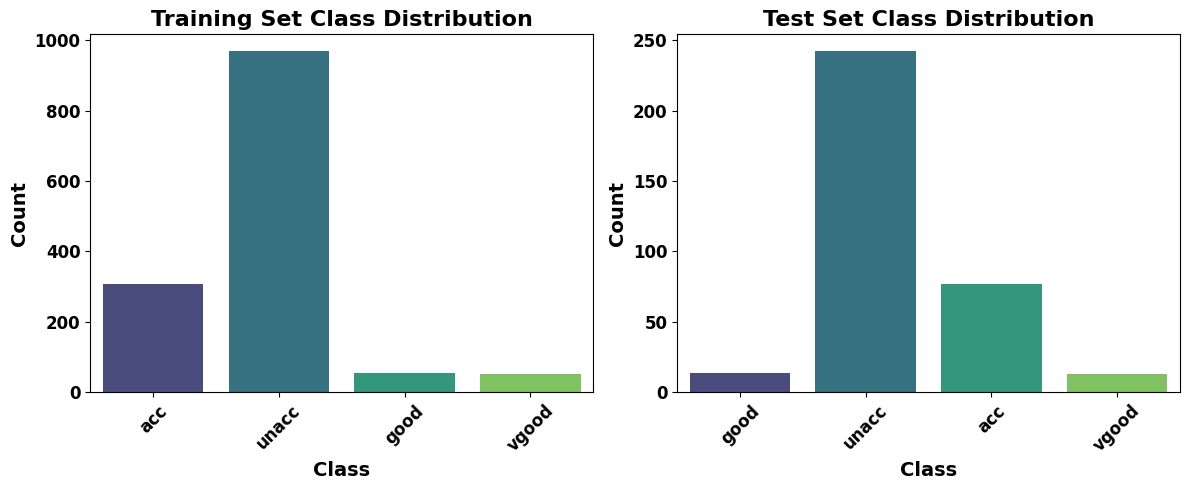

In [233]:


# Split dataset
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['class'])

# Plot class distribution in train and test
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.countplot(x='class', data=train_df, ax=axes[0], palette='viridis')
axes[0].set_title('Training Set Class Distribution',fontsize=16, fontweight='bold')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, fontsize=12, fontweight='bold')
axes[0].set_yticklabels(axes[0].get_yticklabels(), fontsize=12, fontweight='bold')
axes[0].set_xlabel('Class', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=14, fontweight='bold')
sns.countplot(x='class', data=test_df, ax=axes[1], palette='viridis')
axes[1].set_title('Test Set Class Distribution', fontsize=16, fontweight='bold')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, fontsize=12, fontweight='bold')
axes[1].set_yticklabels(axes[1].get_yticklabels(), fontsize=12, fontweight='bold')
axes[1].set_xlabel('Class', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Count', fontsize=14, fontweight='bold') 
plt.tight_layout()
plt.savefig('Data splitting-image',dpi=300)
plt.show()

### Parameter Tuning "Grid search "with Random Forest


In [234]:

# 🔍 Set up Grid Search for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10,15],
    'min_samples_split': [2, 4]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)

# Best model and evaluation
print("Best Parameters:", grid.best_params_)

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

Best Parameters: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.99      0.89      0.94        83
           1       0.65      1.00      0.79        11
           2       0.99      1.00      0.99       235
           3       1.00      0.94      0.97        17

    accuracy                           0.97       346
   macro avg       0.91      0.96      0.92       346
weighted avg       0.98      0.97      0.97       346



# Random Forest Confusion matrix

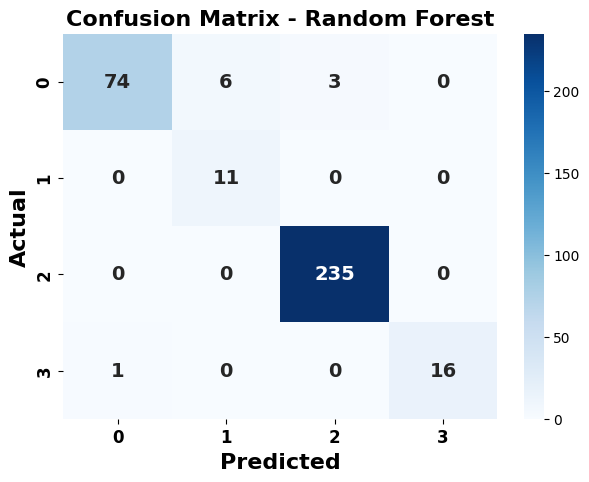

In [235]:
# Confusion matrix

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test),
            annot_kws={"size":14, "weight":'bold'})  # Bold & larger numbers

# Bold & large labels
plt.xlabel('Predicted', fontsize=16, fontweight='bold')
plt.ylabel('Actual', fontsize=16, fontweight='bold')

# Bold & large ticks
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

# Bold & large title
plt.title('Confusion Matrix - Random Forest', fontsize=16, fontweight='bold')

# Save image
plt.savefig('RF_Confusion_Matrix_Image', dpi=300, bbox_inches='tight')

plt.show()


## CHECKING HOW LOSS ARE VARYING  IN RANDOM FOREST

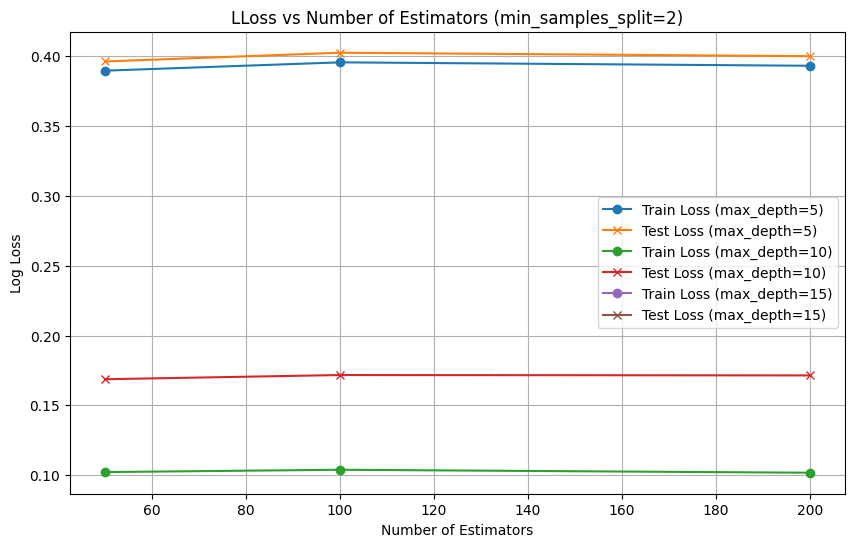

In [236]:


# Your previous code to get df_results is assumed here

# Plot loss curves grouped by max_depth for fixed min_samples_split=2
min_split_fixed = 2

plt.figure(figsize=(10, 6))

for max_d in param_grid['max_depth']:
    subset = df_results[(df_results['max_depth'] == max_d) & (df_results['min_samples_split'] == min_split_fixed)]
    plt.plot(subset['n_estimators'], subset['train_loss'], marker='o', label=f'Train Loss (max_depth={max_d})')
    plt.plot(subset['n_estimators'], subset['test_loss'], marker='x', label=f'Test Loss (max_depth={max_d})')

plt.xlabel('Number of Estimators')
plt.ylabel('Log Loss')
plt.title(f'LLoss vs Number of Estimators (min_samples_split={min_split_fixed})')
plt.legend()
plt.grid(True)
plt.savefig('Loss-image',dpi=300)
plt.show()



## Parameter Tuning"Grid Search" with Support Vector Machine

In [ ]:


# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],            # regularization strength
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],        # kernel coefficient
    'degree': [3, 4, 5]                # only relevant for 'poly' kernel
}

svc = SVC()

grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# After your grid_search.fit(...) from the previous code

best_model = grid_search.best_estimator_

# Predict on test set
y_pred = best_model.predict(X_test)



# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1 Score (weighted): {f1:.4f}")


Best parameters: {'C': 100, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation accuracy: 0.9905901742269659
Accuracy: 0.9884
Precision (weighted): 0.9891
Recall (weighted): 0.9884
F1 Score (weighted): 0.9882


## Support Vector Machine Confusion matrix

<Figure size 1000x800 with 0 Axes>

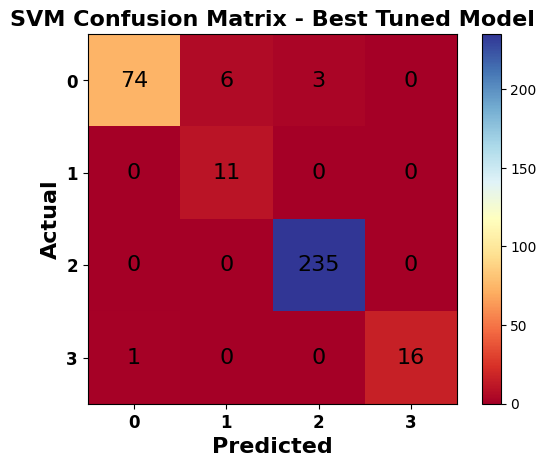

In [237]:
# Confusion Matrix for best model
plt.figure(figsize=(10, 8))
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test,cmap='RdYlBu',text_kw={'color':'k','fontsize':16}) # Bold & larger numbers
plt.xlabel('Predicted', fontsize=16, fontweight='bold')
plt.ylabel('Actual', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.title("SVM Confusion Matrix - Best Tuned Model",fontsize=16, fontweight='bold')
plt.savefig('SV confusion matrix-image',dpi=300)
plt.show()

In [ ]:
ConfusionMatrixDisplay.from_estimator?


Signature:
ConfusionMatrixDisplay.from_estimator(
    estimator,
    X,
    y,
    *,
    labels=None,
    sample_weight=None,
    normalize=None,
    display_labels=None,
    include_values=True,
    xticks_rotation='horizontal',
    values_format=None,
    cmap='viridis',
    ax=None,
    colorbar=True,
    im_kw=None,
    text_kw=None,
)
Docstring:
Plot Confusion Matrix given an estimator and some data.

For general information regarding `scikit-learn` visualization tools, see
the :ref:`Visualization Guide <visualizations>`.
For guidance on interpreting these plots, refer to the
:ref:`Model Evaluation Guide <confusion_matrix>`.

.. versionadded:: 1.0

Parameters
----------
estimator : estimator instance
    Fitted classifier or a fitted :class:`~sklearn.pipeline.Pipeline`
    in which the last estimator is a classifier.

X : {array-like, sparse matrix} of shape (n_samples, n_features)
    Input values.

y : array-like of shape (n_samples,)
    Target values.

labels : array-like of 

# Parameter Tuning "Grid Search" with Gradient Boost

In [200]:


# Define XGBoost classifier
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Hyperparameter grid to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0],
    'gamma': [0, 1, 5]
}

grid_search = GridSearchCV(xgb_clf, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

best_model = grid_search.best_estimator_

# Evaluate on test set
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1 Score (weighted): {f1:.4f}")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Plot training loss (log loss) curve for best model
# We retrain with eval_set to get the evaluation history

eval_set = [(X_train, y_train), (X_test, y_test)]
final_model = xgb.XGBClassifier(**grid_search.best_params_, use_label_encoder=False, eval_metric='mlogloss')
final_model.fit(X_train, y_train, eval_set=eval_set, verbose=False)

results = final_model.evals_result()



Fitting 5 folds for each of 324 candidates, totalling 1620 fits


c:\Users\HP\anaconda3\envs\clean_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:21:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best parameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.7}
Best cross-validation accuracy: 0.990595406267985
Accuracy: 0.9798
Precision (weighted): 0.9858
Recall (weighted): 0.9798
F1 Score (weighted): 0.9811

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.95      0.97        83
           1       0.65      1.00      0.79        11
           2       1.00      1.00      1.00       235
           3       1.00      0.82      0.90        17

    accuracy                           0.98       346
   macro avg       0.91      0.94      0.91       346
weighted avg       0.99      0.98      0.98       346



c:\Users\HP\anaconda3\envs\clean_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:21:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


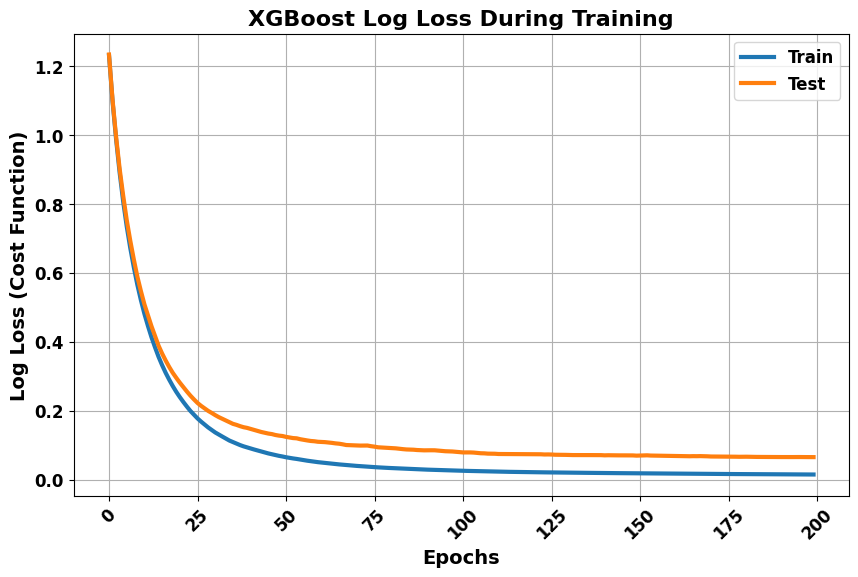

In [238]:
epochs = len(results['validation_0']['mlogloss'])
x_axis = range(0, epochs)

plt.figure(figsize=(10,6))
plt.plot(x_axis, results['validation_0']['mlogloss'], label='Train',linewidth=3)
plt.plot(x_axis, results['validation_1']['mlogloss'], label='Test',linewidth=3)
plt.xlabel('Epochs', fontsize=14, fontweight='bold')
plt.ylabel('Log Loss (Cost Function)', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.title('XGBoost Log Loss During Training', fontsize=16, fontweight='bold')
plt.legend(prop={'size': 12, 'weight': 'bold'})
plt.grid(True)
plt.savefig('loss on xgboost-image',dpi=300)
plt.show()


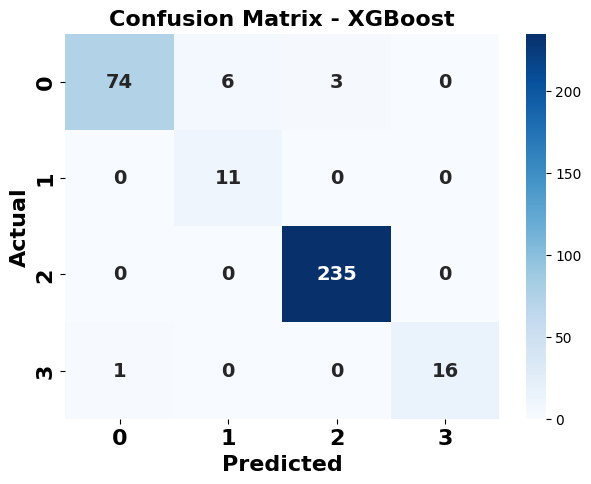

In [239]:
# Confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test),annot_kws={"size":14, "weight":'bold'})  # Bold & larger numbers
plt.xlabel('Predicted',fontsize=16, fontweight='bold')
plt.ylabel('Actual', fontsize=16, fontweight='bold')
plt.title('Confusion Matrix - XGBoost',fontsize=16, fontweight='bold')
plt.xticks(fontsize=16, fontweight='bold')
plt.yticks(fontsize=16, fontweight='bold')

plt.savefig('XGB Confusion matrix-image',dpi=300)
plt.show()

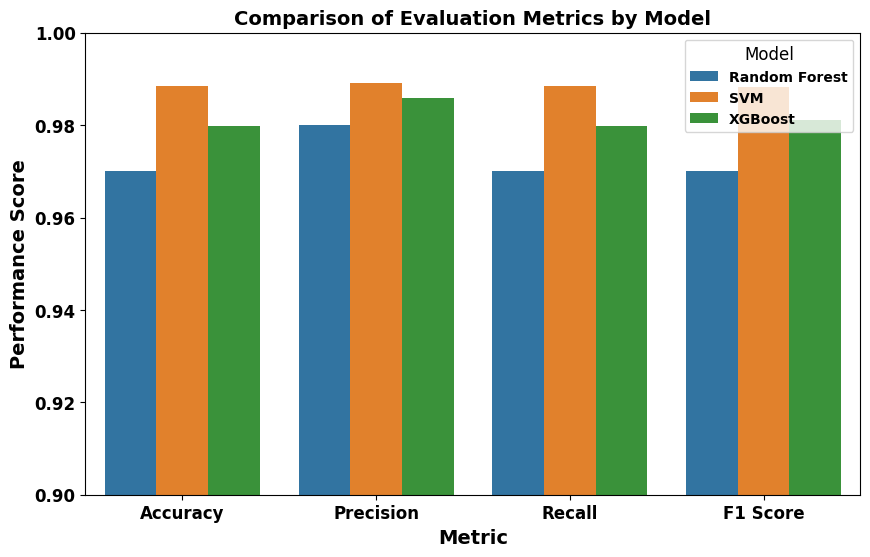

In [241]:

# Data
data = {
    'Model': ['Random Forest', 'SVM', 'XGBoost'],
    'Accuracy': [0.97, 0.9884, 0.9798],
    'Precision': [0.98, 0.9891, 0.9858],
    'Recall': [0.97, 0.9884, 0.9798],
    'F1 Score': [0.97, 0.9882, 0.9811]
}

df_metrics = pd.DataFrame(data)

# Melt the DataFrame
df_melt = df_metrics.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melt, x='Metric', y='Score', hue='Model')

# Formatting
plt.ylim(0.9, 1.0)  
plt.title('Comparison of Evaluation Metrics by Model', fontsize=14, fontweight='bold')
plt.ylabel('Performance Score', fontsize=14, fontweight='bold')
plt.xlabel('Metric', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.legend(prop={'weight':'bold'},title='Model', title_fontsize=12, fontsize=10)

# Save
plt.savefig('Comparison_of_Evaluation_Metrics.png', dpi=300, bbox_inches='tight')
plt.show()
